In [1]:
import os
# from utils import set_watermark
import polars as pl
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [2]:
def color_mapping(df:pl.DataFrame, image_pardir: str | Path) -> cv2.Mat:
    if not isinstance(image_pardir, Path):
        image_pardir = Path(image_pardir)

    # 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
    colors = ((180, 119, 31), (14, 127, 255), (44, 160, 44), (40, 39, 214), (189, 103, 148), (75, 86, 140), (194, 219, 227), (127, 127, 127), (34, 189, 188), (207, 190, 23), (0, 0, 0))
    
    alpha = 0.8
    beta = 1 - alpha
    
    v_img: list[cv2.Mat] = []
    h_img: list[cv2.Mat] = []
    
    try:
        image_paths_and_clusters = df.select([pl.col("filepath"), pl.col("cluster")]).to_numpy()
    except:
        filepath_expr = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
        image_paths_and_clusters = df.select([filepath_expr,pl.col("cluster")]).to_numpy()
    
    # for i, (image_path, main_cluster, sub_cluster) in enumerate(image_paths_and_clusters):
    for i, (image_path, main_cluster,) in enumerate(image_paths_and_clusters):
        # print(i)
        image: cv2.Mat = cv2.imread(str(image_pardir / image_path))

        img_filter = np.zeros(image.shape[:], dtype=np.uint8)
        img_filter[:] = colors[main_cluster]
        
        image = cv2.addWeighted(image, alpha, img_filter, beta, 0)

        h_img.append(image)

        if (i+1) % 40 == 0:
            v_img.append(cv2.hconcat(h_img))
            h_img.clear()
            
    
    return cv2.vconcat(v_img)

---

In [4]:
# csv_root = Path('/home/shinsei/img_crop/forest/AdamPaper/feature/clusterized/vbgm_pca3_forest_for_check_lr1e-03_lf6.4e+01_epoch1000_SPARSE_CAE_rho05_beta05_selu.csv')
lf = 64
AE_model = 'cae'
csv_root = Path('/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCVAE_softplus32/2023-07-18/19-08-34/feature_check_data_clustering.csv')
save_dir = Path('/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-07-18/reconcatenate_images')
df = pl.read_csv(csv_root)
# mask = (df_pca_lf500['height_class'].values >= 1) & (df_pca_lf500['height_class'].values <= 3)
# out_pca = rebuilt_image(df_pca_lf500[mask])
# out_pca_lf500 = rebuilt_image(df_pca_lf500)

In [6]:
df.head()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,dirname,filename,filepath,cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
0.371207,0.773912,0.321,0.97179,0.467441,-0.794627,0.155872,-0.429781,-0.62078,0.092581,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.466664,0.800218,0.09891,-0.229312,0.719136,-0.84856,1.146627,0.535144,0.163504,-0.539297,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.139828,-0.057409,-0.205014,-0.360194,0.178539,-0.288145,0.027653,-0.986673,-0.295563,-0.346313,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
0.108137,0.61107,-0.408147,0.128743,0.614519,-1.381092,-0.371074,0.507027,0.002102,0.196136,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.846178,-0.870254,-0.509567,0.478472,-0.679784,0.488236,-0.023896,0.480033,0.004727,-1.526124,0,"""10k_0_h000_w01…","""0/10k_0_h000_w…",9


In [7]:
save_dir

PosixPath('/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-07-18/reconcatenate_images')

In [11]:
!pwd

/home/shinsei/MyResearchs/feat_extrc/notebooks


In [8]:
Path('../data/processed/check/CNTForest/cnt_sem_for_check_32x32/10k/').exists()

True

In [12]:
# img_classes = df['image_class'].values
# if not os.path.exists(save_dir / f'colormap_{AE_model}_lf{lf}'):
#     os.makedirs(save_dir / f'colormap_{AE_model}_lf{lf}')
img_classes = df.select(pl.col("dirname")).to_numpy().flatten()
imgs: list[cv2.Mat] = []
for l in np.unique(img_classes):
    print(l)
    img = color_mapping(df.filter(pl.col("dirname") == l), '../data/processed/check/CNTForest/cnt_sem_for_check_32x32/10k/')
    imgs.append(img)
    # cv2.imwrite(str(save_dir/'colormap_{AE_model}_lf{lf}'/f'image_class{l}.png'), img)
    cv2.imwrite(str(save_dir/f'image_class{l}.png'), img)

0
1
2
3
4
5
6
7
8


In [44]:
df.filter(pl.col("dirname") == 9).select(pl.col("cluster"))

cluster
i64


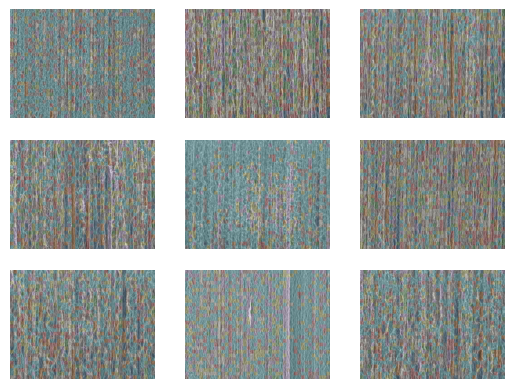

In [10]:
fig = plt.figure()
for i, img in enumerate(imgs):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_axis_off()